# Coding etiquette and excel reporting - Part 1, Step 9, part B

## Content list:

#### 01. Importing libraries
#### 02. Importing data 
#### 03. Producing visualizations to illustrate results (part B)
##### 03.1 Orders by department chart
##### 03.2 Other department charts
##### 03.3 Price range charts
##### 03.4 Hour of order and day of the week
##### 03.5 Prices and Income chart
##### 03.6 Customer Frequency and Loyalty charts
#### 04. Exporting dataframe

## 01. Importing libraries

In [27]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 0.2 Importing data

In [28]:
path= r'C:\Users\isobr\OneDrive\02122022Instacart Basket Analysis'

In [29]:
path

'C:\\Users\\isobr\\OneDrive\\02122022Instacart Basket Analysis'

In [30]:
cust_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'normal_cust_prods.pkl'))

In [31]:
cust_prods.shape

(30964564, 42)

In [32]:
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [33]:
cust_prods.columns

Index(['Unnamed: 0_x', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'Unnamed: 0.1', 'Unnamed: 0_y', 'order_id',
       'user_id', 'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'price_range_loc', 'busiest_day', 'busier_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spender_flag', 'median_frequency', 'frequency_flag', 'surname',
       'Gender', 'State', 'Age', 'date_joined', 'number_dependants',
       'family_status', 'income', 'region', 'activity_flag', 'age_flag',
       'income_flag', 'family_flag', 'product_type', 'popular_products',
       'popular_family_flag'],
      dtype='object')

In [34]:
# should have done it before, but will now rename Gender to be in lower case and change family_status to marital_status
cust_prods.rename(columns = {'Gender' : 'gender'}, inplace = True)

In [35]:
cust_prods.rename(columns = {'family_status' : 'marital_status'}, inplace = True)

In [36]:
#rename price_range column (yes, I should have done it before, but only saw it now!)
cust_prods.rename(columns = {'price_range_loc' : 'price_range'}, inplace = True)

In [37]:
#rename Age column (yes, I should have done it before, but only saw it now!)
cust_prods.rename(columns = {'Age' : 'age'}, inplace = True)

In [38]:
df_dep.columns

Index(['Unnamed: 0', 'department'], dtype='object')

In [39]:
# Renaming 0 to department_id so that it is possible to merge dataframes for producing visualizations that show ids with department names
df_dep.rename(columns ={'Unnamed: 0': 'department_id'}, inplace = True)

In [40]:
df_dep.columns

Index(['department_id', 'department'], dtype='object')

### 03. Producing visualizations to illustrate results (part B)

Text(0.5, 0, 'Days of the week (0=Sunday; 6=Friday)')

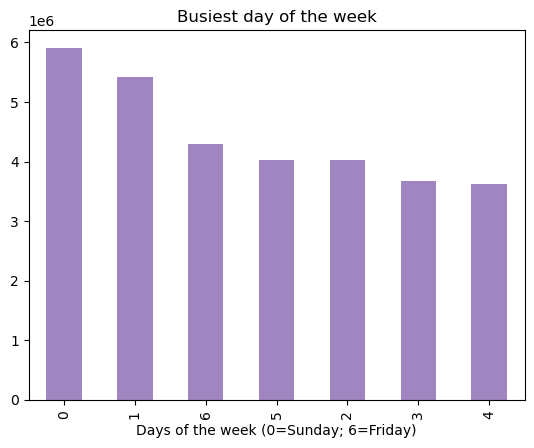

In [41]:
# To address the first question regarding the orders during days of the week
bar_busy_days = cust_prods['orders_day_of_week'].value_counts().plot.bar(color=['#9f86c0'])
plt.title('Busiest day of the week')
plt.xlabel('Days of the week (0=Sunday; 6=Friday)')

In [42]:
price_hour = pd.crosstab(cust_prods['order_hour_of_day'],cust_prods['price_range'])

In [43]:
price_hour.to_clipboard()

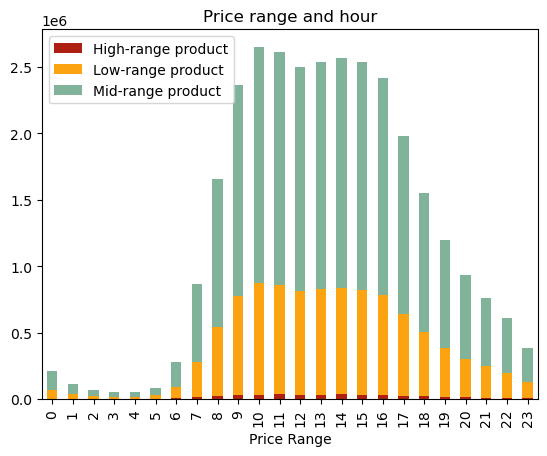

In [17]:
#creating a visual to illustrate changes in price range accross hour of the day
bar_price_hour = price_hour. plot(kind= 'bar', stacked = True, color=['#ae2012','#fca311','#81b29a'])
plt.title('Price range and hour')
bar_price_hour.legend(loc='upper left')
plt.xlabel('Price Range')
width = 0.20 

#### 03.1 Orders by department chart

In [18]:
#To have the departments listed by names, with the order frequency, I need to merge the two dataframes
#creating a small sub-set to merge with department_id
cust_prods_small = cust_prods[['user_id','department_id','order_id','orders_day_of_week']]

In [19]:
#now merging with the df_dep, using department_id
dp_names = cust_prods_small.merge(df_dep, on = 'department_id')

In [20]:
dp_names.head(3)

,user_id,department_id,order_id,orders_day_of_week,department
0,138,19,3139998,6,snacks
1,138,19,1977647,6,snacks
2,138,19,894221,5,snacks


In [24]:
department_names=dp_names['department'].value_counts (dropna=False)

In [26]:
department_names.to_clipboard ()

Text(0.5, 0, 'Department')

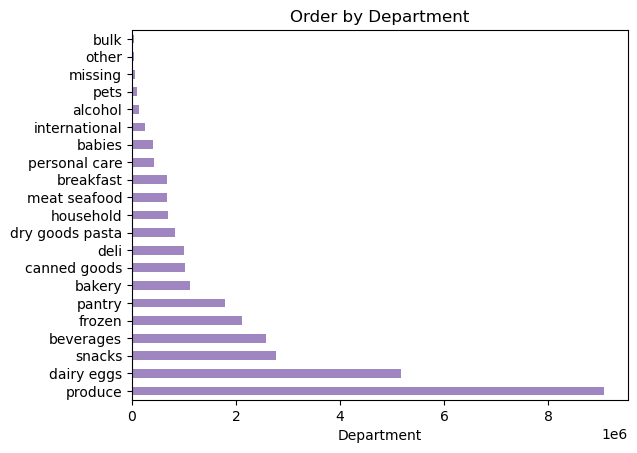

In [59]:
# creating bar chart that shows names of departments and number of orders per department
bar_dep_names = dp_names['department'].value_counts().plot.barh(color=['#9f86c0'])
plt.title('Order by Department')
plt.xlabel('Department')

In [60]:
#saving figure
bar_dep_names.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_names.png'))  

In [61]:
#orders per day of the week
dep_orders_dow = pd.crosstab(dp_names['orders_day_of_week'], dp_names['department'])

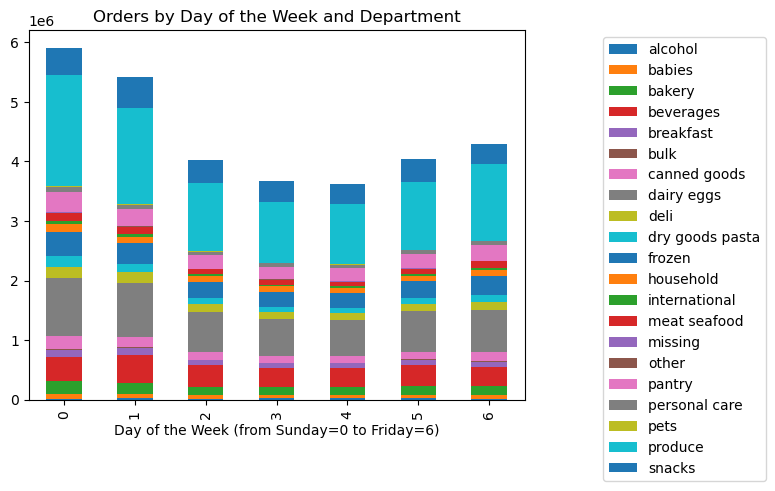

In [62]:
#creating a visual
bar_orders_dow = dep_orders_dow.plot(kind= 'bar', stacked = True)
plt.title('Orders by Day of the Week and Department')
bar_orders_dow.legend(loc='upper right', bbox_to_anchor=(1.5, 1.0), ncol=1)
plt.xlabel('Day of the Week (from Sunday=0 to Friday=6)')
width = 0.20 

In [63]:
#saving figure
bar_orders_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))  

In [64]:
dep_orders_dow2 = pd.crosstab(cust_prods['orders_day_of_week'], cust_prods['popular_products'])

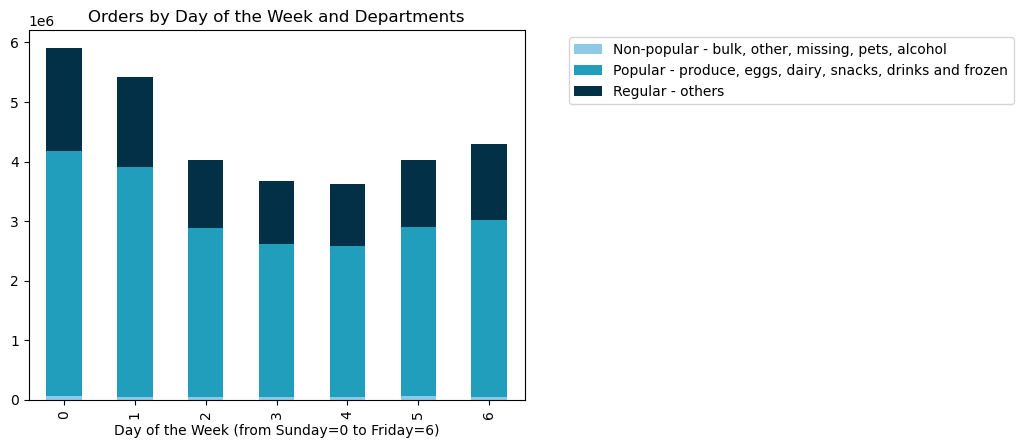

In [65]:
#creating a visual
bar_orders_dow2 = dep_orders_dow2.plot(kind= 'bar', stacked = True,color=['#8ecae6','#219ebc','#023047'])
plt.title('Orders by Day of the Week and Departments')
bar_orders_dow2.legend(loc='upper right', bbox_to_anchor=(2.0, 1.0), ncol=1)
plt.xlabel('Day of the Week (from Sunday=0 to Friday=6)')
width = 0.20 

In [66]:
#saving figure
bar_orders_dow2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow2.png'))  

#### 03.2 Other department charts

In [67]:
#following the same principle, now I need a subset of the dataframe with department_id, names, gender, family_status I will include'reordered' too
cust_prods_smaller = cust_prods[['user_id','department_id','order_id','gender','marital_status','reordered']]

In [68]:
#now merging with df_dep
dp_small2 = cust_prods_smaller.merge(df_dep, on = 'department_id')

In [69]:
#comparing the two to create a visual
dep_gender = pd.crosstab(dp_small2['department'], dp_small2['gender'])

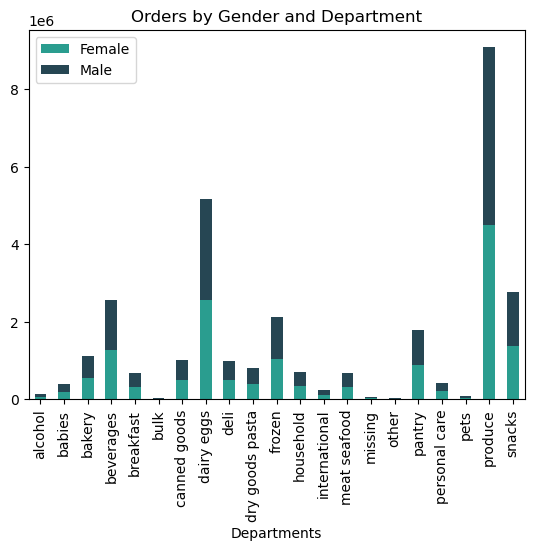

In [70]:
bar_dep_gender = dep_gender.plot(kind= 'bar', stacked = True,color=['#2a9d8f','#264653'] )
plt.title('Orders by Gender and Department')
bar_dep_gender.legend(loc='upper left')
plt.xlabel('Departments')
width = 0.20 

In [71]:
# saving figure
bar_dep_gender.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_gender.png'))  

In [72]:
#comparing the department and reordered to create a visual
dep_orders = pd.crosstab(dp_small2['department'], dp_small2['reordered'])

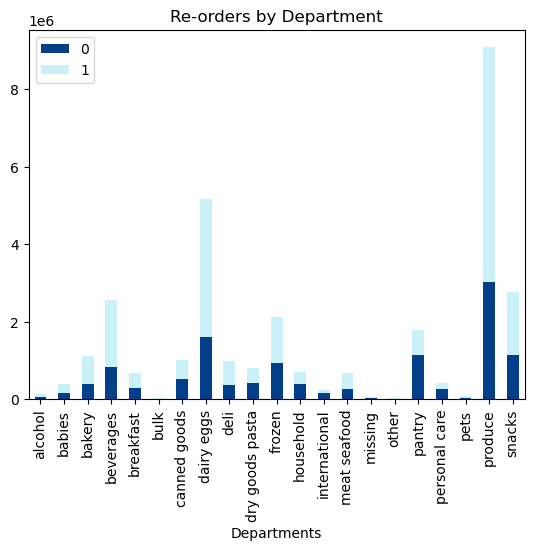

In [73]:
#similar visual for reordered
bar_orders = dep_orders.plot(kind= 'bar', stacked = True, color=['#023e8a','#caf0f8'])
plt.title('Re-orders by Department')
bar_orders.legend(loc='upper left')
plt.xlabel('Departments')
width = 0.20 

In [74]:
# saving figure
bar_orders.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders.png'))  

In [75]:
#comparing department and family_status to create a visual
dep_fam = pd.crosstab(dp_small2['department'], dp_small2['marital_status'])

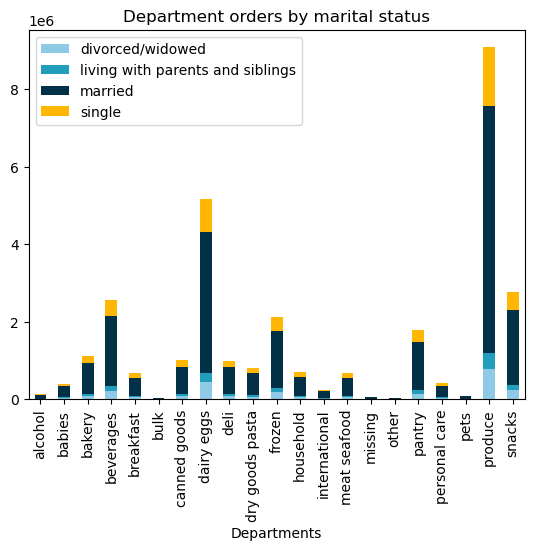

In [76]:
#similar visual for 'family status'
bar_dep_fam = dep_fam.plot(kind= 'bar', stacked = True, color=['#8ecae6','#219ebc','#023047','#ffb703'])
plt.title('Department orders by marital status')
bar_dep_fam.legend(loc='upper left')
plt.xlabel('Departments')
width = 0.20 

In [29]:
# saving figure
bar_dep_fam.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_fam.png'))  

In [77]:
#comparing spender flag and marital_status to create a visual
spend_fam = pd.crosstab(cust_prods['spender_flag'], cust_prods['marital_status'])

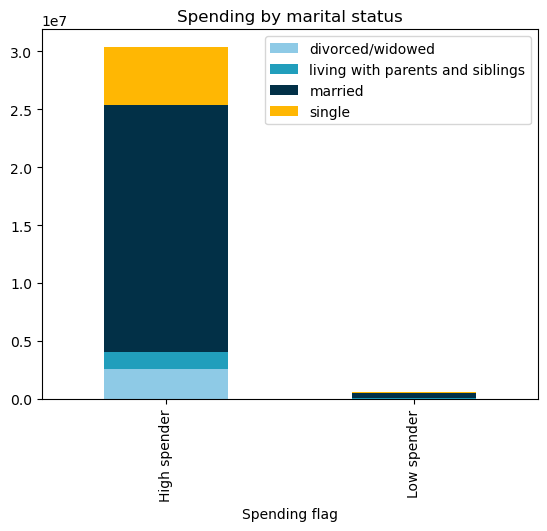

In [80]:
#creating a visual
bar_spend_fam = spend_fam.plot(kind= 'bar', stacked = True, color=['#8ecae6','#219ebc','#023047','#ffb703'])
plt.title('Spending by marital status')
bar_spend_fam.legend(loc='upper right')
plt.xlabel('Spending flag')
width = 0.20 

#### 03.3 Price range charts

In [32]:
cust_prods_small3 = cust_prods[['user_id','department_id','order_id','price_range']]

In [33]:
#merge dataframes
dp_small4 = cust_prods_small3.merge(df_dep, on = 'department_id')

In [34]:
#comparing department and price range to create a visual
dep_price = pd.crosstab(dp_small4['department'], dp_small4['price_range'])

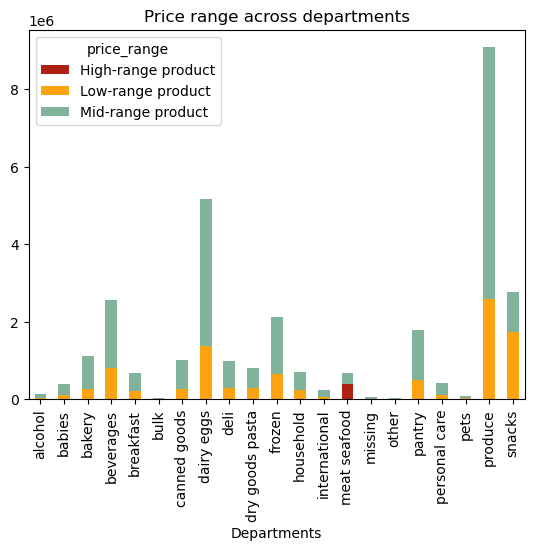

In [35]:
#visualization
bar_dep_price = dep_price.plot(kind= 'bar', stacked = True, color=['#ae2012','#fca311','#81b29a'])
plt.title('Price range across departments')
bar_dep_fam.legend(loc='upper left')
plt.xlabel('Departments')
width = 0.20 

Price are mainly mid-range across all departments except for meat/seafood where prices are higher

In [36]:
# saving figure
bar_dep_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_price.png'))  

#### 03.4 Hour of order and day of the week

In [37]:
# creating a sample of the data for producting visuals
np.random.seed(4)

In [38]:
dev = np.random.rand(len(cust_prods)) <= 0.7

In [39]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [40]:
#creating a big sample (i.e., 70%)
big = cust_prods[dev]

In [41]:
# creating a small sample (i.e., 30%)
small = cust_prods[~dev]

In [42]:
#checking
len(big)+len(small)

30964564

In [43]:
# reducing the df only to the charts that matter for the line charts
#line chart to compare orders by day and hour to check differences between these
df_2 = small[['orders_day_of_week', 'order_hour_of_day',]]

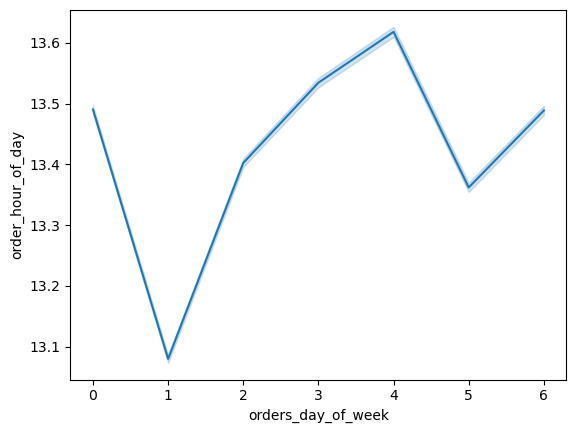

In [44]:
line_orders = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'order_hour_of_day')

Line charts show that during the weekend early morning hours are very slow, compared week days

In [45]:
# saving figure
line_orders.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders.png'))  

#### 03.5 Prices and Income chart

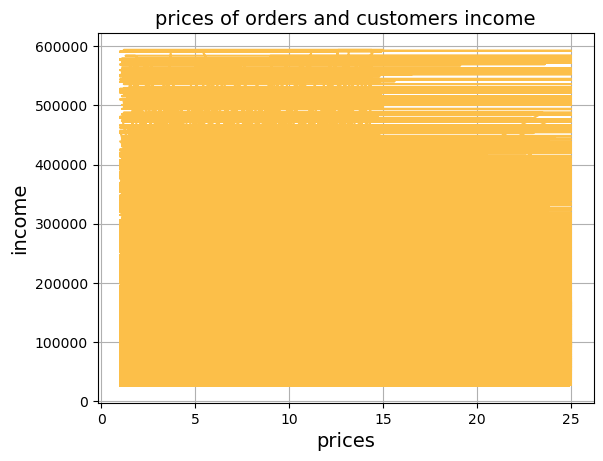

In [46]:
#Creating a scatterplot using matplotlib  
scatterplot_prices=plt.plot(small['prices'], small['income'], color='#fcbf49')
plt.title('prices of orders and customers income', fontsize=14)
plt.xlabel('prices', fontsize=14)
plt.ylabel('income', fontsize=14)
plt.grid(True)
plt.show()

Although the differences are slim, higher prices are acquired by higher income customers

#### 03.6 Customer Frequency and Loyalty charts

In [47]:
#comparing frequency and loyalty of customer orders with gender and marital status
fre_gender = pd.crosstab(cust_prods['frequency_flag'], cust_prods['gender'])

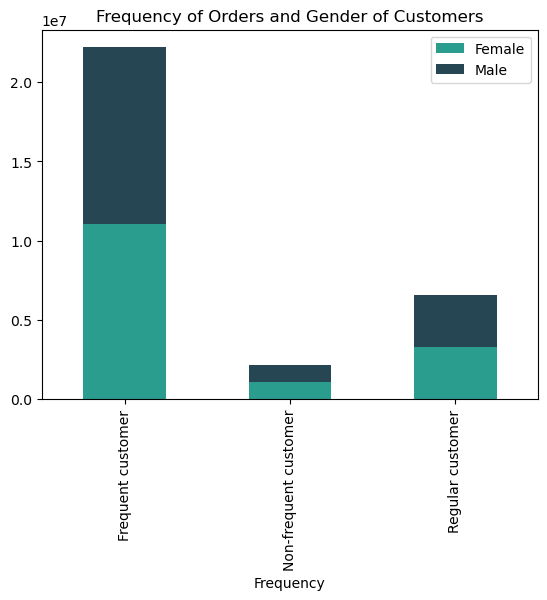

In [54]:
#visualization
bar_fre_gender=fre_gender.plot(kind= 'bar', stacked = True, color=['#2a9d8f','#264653'])
plt.title('Frequency of Orders and Gender of Customers')
bar_fre_gender.legend(loc='upper right')
plt.xlabel('Frequency')
width = 0.20 

In [55]:
# saving figure
bar_fre_gender.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_fre_gender.png'))  

In [48]:
loy_gender = pd.crosstab(cust_prods['loyalty_flag'], cust_prods['gender'])

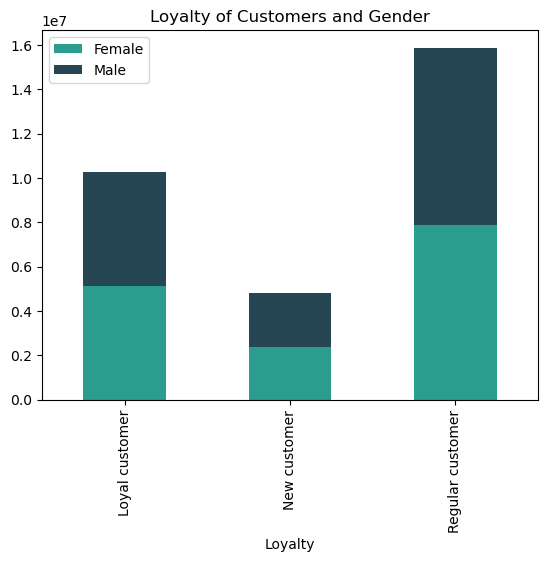

In [57]:
bar_loy_gender=loy_gender.plot(kind= 'bar', stacked = True, color=['#2a9d8f','#264653'])
plt.title('Loyalty of Customers and Gender')
bar_loy_gender.legend(loc='upper left')
plt.xlabel('Loyalty')
width = 0.20 

In [58]:
bar_loy_gender.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loy_gender.png'))  

In [49]:
fre_mar = pd.crosstab(cust_prods['frequency_flag'], cust_prods['marital_status'])

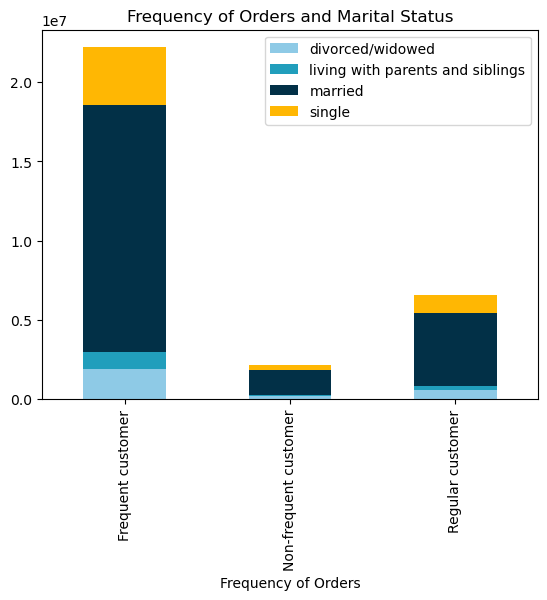

In [60]:
bar_fre_mar=fre_mar.plot(kind= 'bar', stacked = True, color=['#8ecae6','#219ebc','#023047','#ffb703'])
plt.title('Frequency of Orders and Marital Status')
bar_fre_mar.legend(loc='upper right')
plt.xlabel('Frequency of Orders')
width = 0.20 

In [61]:
bar_fre_mar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_fre_mar.png'))  

In [50]:
loy_mar = pd.crosstab(cust_prods['loyalty_flag'], cust_prods['marital_status'])

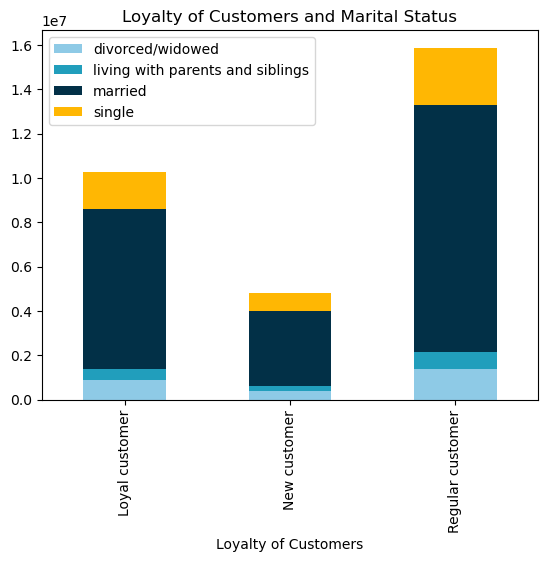

In [62]:
bar_loy_mar=loy_mar.plot(kind= 'bar', stacked = True, color=['#8ecae6','#219ebc','#023047','#ffb703'])
plt.title('Loyalty of Customers and Marital Status')
bar_loy_mar.legend(loc='upper left')
plt.xlabel('Loyalty of Customers')
width = 0.20 

In [63]:
bar_loy_mar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loy_mar.png'))  

In [64]:
loy_region = pd.crosstab(cust_prods['loyalty_flag'], cust_prods['region'])

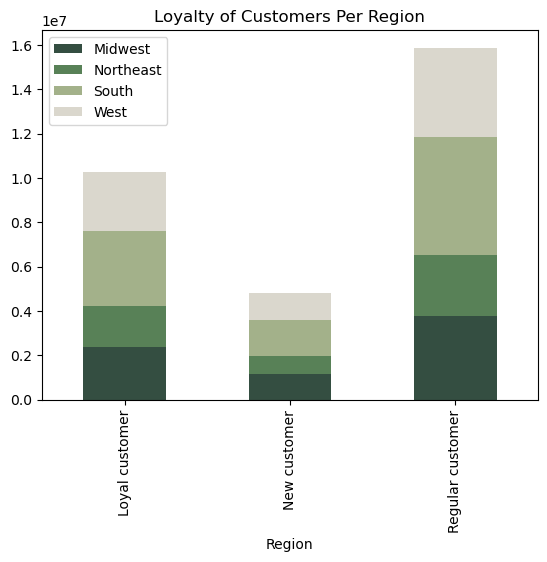

In [66]:
bar_loy_region=loy_region.plot(kind= 'bar', stacked = True, color=['#344e41','#588157','#a3b18a','#dad7cd'])
plt.title('Loyalty of Customers Per Region')
bar_loy_region.legend(loc='upper left')
plt.xlabel('Region')
width = 0.20 

In [67]:
bar_loy_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loy_region.png'))  

### 04. Exporting dataframe

In [26]:
cust_prods.to_pickle(os.path.join(path, '02 Data','Prepared data', 'cust_prods_final.pkl'))